# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imdb-movies.csv')

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   director              10822 non-null  object 
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  release_year          10866 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB


### Data Cleaning

In [6]:
# Delete all records with null, or empty values
df.isna().sum()



id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
release_date               0
release_year               0
dtype: int64

In [7]:
df.dropna(inplace=True)

df.isna().sum()


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_date            0
release_year            0
dtype: int64

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [8]:
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9805 non-null   int64  
 1   imdb_id               9805 non-null   object 
 2   popularity            9805 non-null   float64
 3   budget                9805 non-null   int64  
 4   revenue               9805 non-null   int64  
 5   original_title        9805 non-null   object 
 6   director              9805 non-null   object 
 7   genres                9805 non-null   object 
 8   production_companies  9805 non-null   object 
 9   release_date          9805 non-null   object 
 10  release_year          9805 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 919.2+ KB


In [9]:
df2 = df2.drop('genres', axis=1)
df1 = df1.drop('production_companies', axis=1)

<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [16]:
dfsplitcompanies = df2.copy(deep=True) 
dfsplitcompanies['production_companies'] = dfsplitcompanies['production_companies'].apply(lambda r:r.split('|'))
newdfcompanies = dfsplitcompanies.explode('production_companies')

answercompanies = newdfcompanies.groupby('production_companies').id.count().sort_values(ascending=False)

companyplot = answercompanies.head()

companyplot.head()

production_companies
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
Name: id, dtype: int64

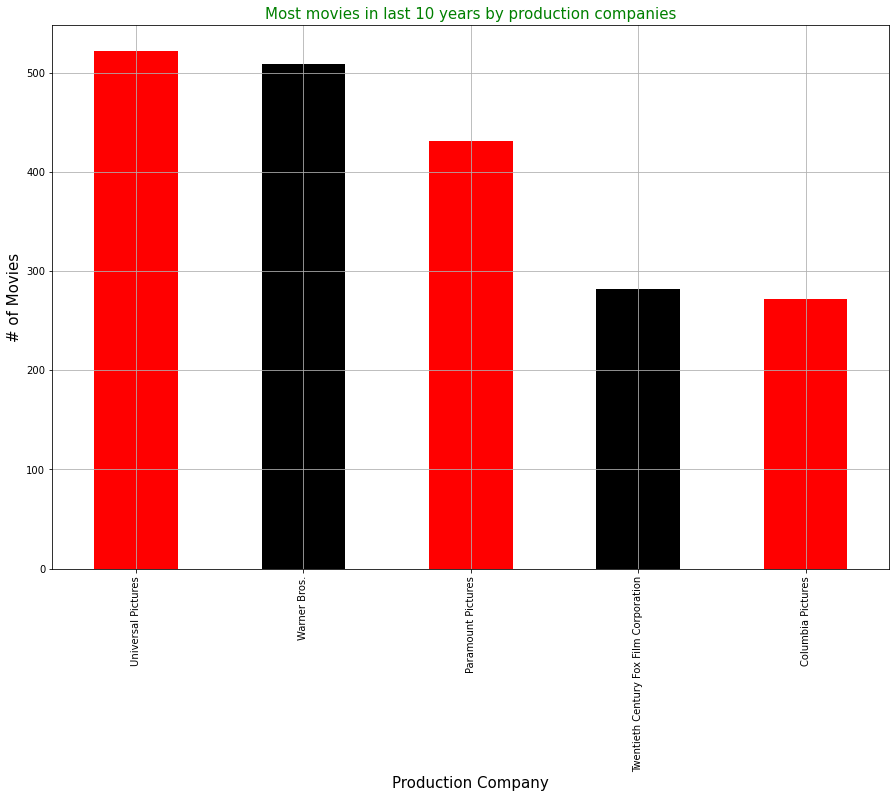

In [14]:
companyplot.plot(kind='bar', grid=True, color=['red', 'black'], figsize=(15, 10))

plt.title('Most movies in last 10 years by production companies', fontsize=15, color='g')
plt.xlabel('Production Company', fontsize=15)
plt.ylabel('# of Movies', fontsize=15);
plt.show()

### What 5 movie genres grossed the highest all-time?

In [21]:
dfsplitgenres = df1.copy(deep=True) 
dfsplitgenres['genres'] = dfsplitgenres['genres'].apply(lambda r:r.split('|'))
newdfgenres = dfsplitgenres.explode('genres')

answergenres = newdfgenres.groupby('genres').revenue.sum().sort_values(ascending=False)

genresplot = answergenres.head()

genresplot.head()

genres
Action       173418313979
Adventure    166317625752
Comedy       142141376544
Drama        138896772395
Thriller     121189561087
Name: revenue, dtype: int64

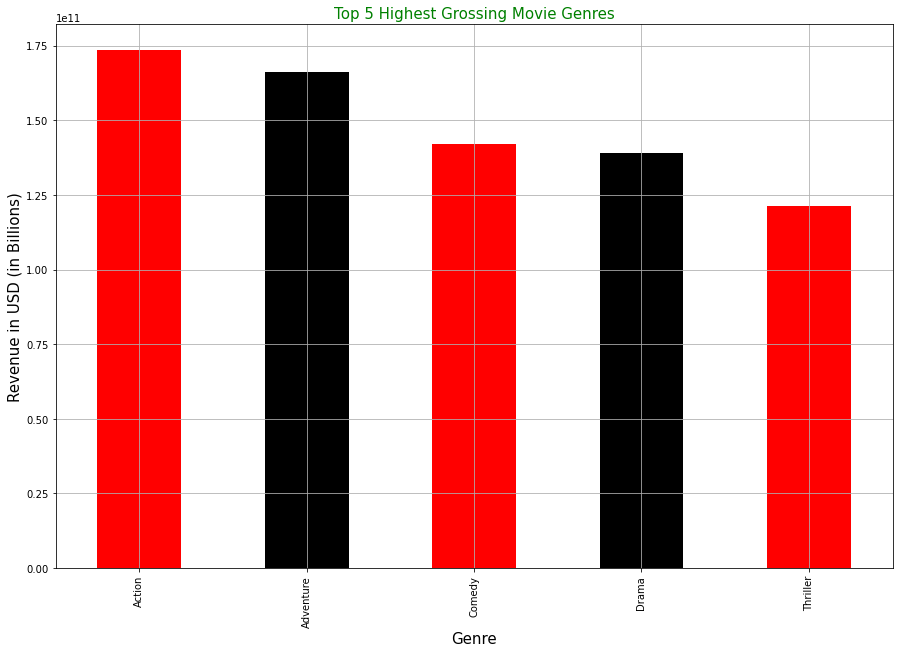

In [22]:
genresplot.plot(kind='bar', grid=True, color=['red', 'black'], figsize=(15, 10))

plt.title('Top 5 Highest Grossing Movie Genres', fontsize=15, color='g')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Revenue in USD (in Billions)', fontsize=15);
plt.show()

### Who are the top 5 grossing directors?

In [24]:
dfsplitdirectors = df1.copy(deep=True) 
dfsplitdirectors['director'] = dfsplitdirectors['director'].apply(lambda r:r.split('|'))
newdfdirectors = dfsplitdirectors.explode('director')

answerdirectors = newdfdirectors.groupby('director').revenue.sum().sort_values(ascending=False)

directorsplot = answerdirectors.head()

directorsplot.head()



director
Steven Spielberg     9048014691
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

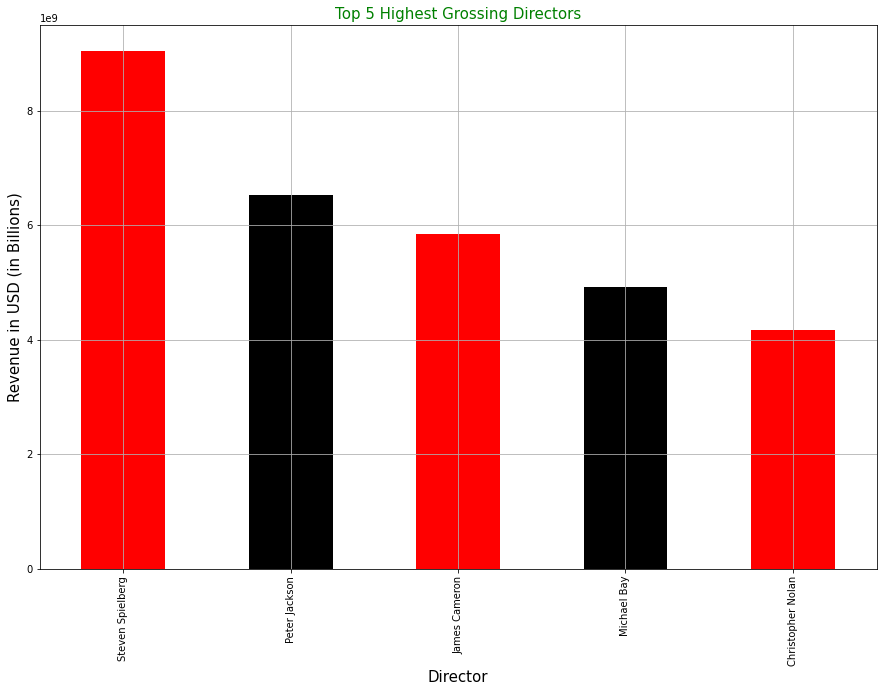

In [25]:
directorsplot.plot(kind='bar', grid=True, color=['red', 'black'], figsize=(15, 10))

plt.title('Top 5 Highest Grossing Directors', fontsize=15, color='g')
plt.xlabel('Director', fontsize=15)
plt.ylabel('Revenue in USD (in Billions)', fontsize=15);
plt.show()

### Compare the revenue of the highest grossing movies of all time.

In [31]:
answerrevenue = revplot = df1.groupby('original_title').revenue.sum().sort_values(ascending=False)

revplot = answerrevenue.head()

revplot.head()



original_title
Avatar                          2781505847
Star Wars: The Force Awakens    2068178225
Titanic                         1845034188
The Avengers                    1568080742
Jurassic World                  1513528810
Name: revenue, dtype: int64

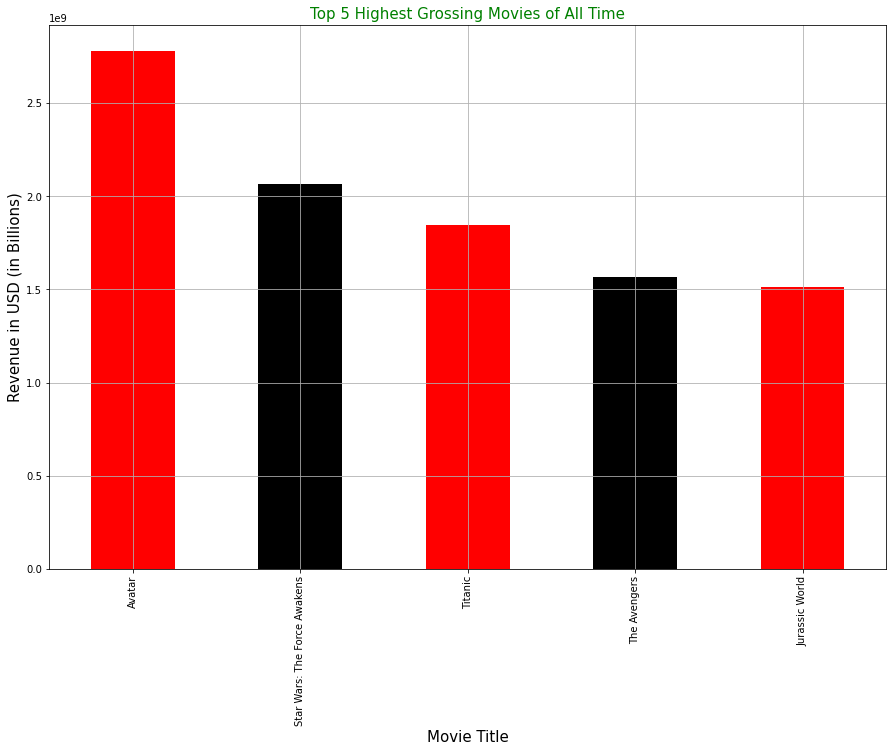

In [32]:
revplot.plot(kind='bar', grid=True, color=['red', 'black'], figsize=(15, 10))

plt.title('Top 5 Highest Grossing Movies of All Time', fontsize=15, color='g')
plt.xlabel('Movie Title', fontsize=15)
plt.ylabel('Revenue in USD (in Billions)', fontsize=15);
plt.show()

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.